In [2]:
pip install pycaret --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.3 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.17.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pycaret
from pycaret.regression import *
from pycaret.classification import *
print('PyCaret: %s' % pycaret.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('Matplotlib: %s' % matplotlib.__version__)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

PyCaret: 2.3.3
Matplotlib: 3.4.2
/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


In [4]:
# read in competition data
df_train = pd.read_csv('../input/tabular-playground-series-aug-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-aug-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')

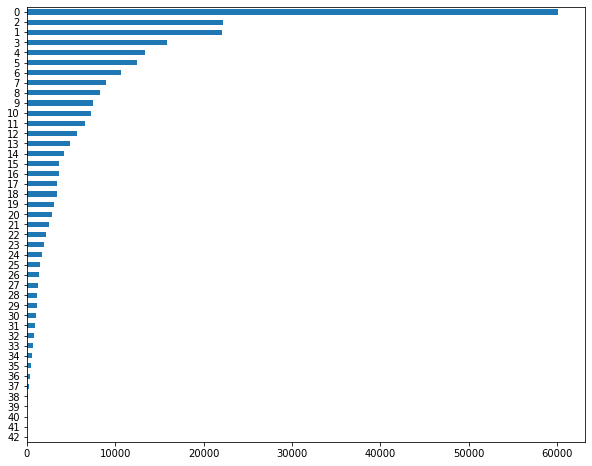

In [5]:
plt.figure(figsize=(10,8))
df_train.loss.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [6]:
#df_train_classification=
df_train[df_train.loss < 3].shape

(104438, 102)

In [8]:
# make a new training dataframe where target variables 0, 1, 2 are replaced by 1 and the rest by 0
df_train_classification = df_train.copy()
df_train_classification.loss = np.where(df_train_classification.loss <3,
                                       1,
                                       0)

In [10]:
df_train_classification.loss.value_counts()

0    145562
1    104438
Name: loss, dtype: int64

### Step 1: use Classification to learn if loss is 0 or not

In [20]:
exp_clf = setup(data = df_train_classification, target = 'loss', silent=True, 
                normalize = True, transformation = True, 
                remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                session_id=123)

,Description,Value
0,session_id,123
1,Target,loss
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(250000, 102)"
5,Missing Values,False
6,Numeric Features,101
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
get_config('X_train') 

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
168739,0.929373,-0.041064,0.573216,-0.839378,-0.897078,0.384602,0.637843,0.109111,-0.891385,0.044006,...,-0.311923,-0.751607,0.353547,-0.691308,0.941604,0.011827,0.126571,0.092653,-1.195899,-1.557792
157999,0.680644,-1.274145,0.370152,1.124421,1.322915,0.399429,-0.929336,0.706540,-1.501598,-0.806804,...,0.737672,-0.971945,-0.225662,1.562808,-1.180328,0.782638,-0.221674,-1.117018,0.663440,-0.916700
31969,-1.055687,-0.388515,-0.668841,1.428675,-0.654714,0.366107,1.679073,0.440075,0.899164,0.687473,...,0.440682,-0.828739,-2.206832,-0.698276,0.968169,-0.022362,0.660977,1.026304,1.097622,0.540032
159363,0.115409,-1.274145,-1.586456,-0.698465,-0.268534,0.276649,0.340686,2.008407,-0.126376,0.244528,...,0.398196,-1.041674,1.616301,-0.106457,0.719477,-2.084482,0.006719,-1.706152,-2.398668,1.090467
130537,0.498120,0.361403,-0.426702,-1.353018,-0.886718,-1.333841,0.840563,0.681791,-1.745703,-0.186939,...,0.007475,1.256822,-1.294044,-0.180442,0.090756,0.277268,-2.096361,-0.395421,-0.527267,0.318402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,1.723597,1.395996,0.036522,0.718508,-0.749249,2.552446,-1.186142,-1.081350,-0.126574,-0.449414,...,0.496208,-0.632442,-1.474627,-0.346291,0.445391,0.783852,-0.130369,-1.111838,-0.598133,1.500351
17730,-1.486588,-0.463850,-0.701366,0.737240,1.330551,-1.909348,-1.037533,0.246326,-0.721968,-1.853486,...,-1.287726,1.779055,1.744907,-0.826333,-0.132657,-0.530744,1.848035,0.098142,-0.393239,-1.415093
28030,-0.109886,0.916791,0.327108,-0.189946,0.816443,-1.058405,-0.056614,-0.544752,-0.227512,0.151829,...,0.786865,-0.453006,-0.017263,1.754698,0.711975,0.549480,-0.185022,-0.951126,-0.489690,0.268258
15725,0.985248,-0.174156,-0.420531,0.314441,-0.991702,0.399641,1.125384,1.069205,-0.093476,0.148181,...,0.450547,-0.882167,0.318152,1.047253,-0.708830,0.451803,2.268971,0.008640,1.034447,0.874172


In [31]:
#best_model = compare_models(fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7600,0.4997,1.0000,0.7600,0.8637,0.0000,0.0000,1.7960
nb,Naive Bayes,0.7600,0.5173,1.0000,0.7600,0.8637,0.0000,0.0000,0.3040
svm,SVM - Linear Kernel,0.7600,0.0000,1.0000,0.7600,0.8637,-0.0000,-0.0006,18.4620
ridge,Ridge Classifier,0.7600,0.0000,1.0000,0.7601,0.8637,0.0001,0.0035,0.3220
rf,Random Forest Classifier,0.7600,0.6025,0.9997,0.7601,0.8636,0.0006,0.0082,139.4140
gbc,Gradient Boosting Classifier,0.7600,0.6457,1.0000,0.7601,0.8637,0.0001,0.0027,371.4060
lda,Linear Discriminant Analysis,0.7600,0.5895,0.9998,0.7601,0.8636,0.0007,0.0103,2.8520
et,Extra Trees Classifier,0.7600,0.5815,1.0000,0.7601,0.8637,0.0001,0.0031,33.1700
lightgbm,Light Gradient Boosting Machine,0.7600,0.6588,0.9990,0.7604,0.8635,0.0030,0.0218,8.1140
ada,Ada Boost Classifier,0.7589,0.6296,0.9962,0.7607,0.8627,0.0050,0.0212,67.7580


In [22]:
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5856,0.5588,0.0878,0.5260,0.1504,0.0351,0.0600
1,0.5871,0.5615,0.0874,0.5372,0.1503,0.0378,0.0653
2,0.5857,0.5620,0.0870,0.5267,0.1494,0.0350,0.0600
3,0.5856,0.5557,0.0896,0.5252,0.1531,0.0356,0.0603
4,0.5871,0.5626,0.0885,0.5367,0.1519,0.0381,0.0655
Mean,0.5862,0.5601,0.0880,0.5304,0.1510,0.0363,0.0622
SD,0.0007,0.0026,0.0009,0.0054,0.0013,0.0014,0.0026


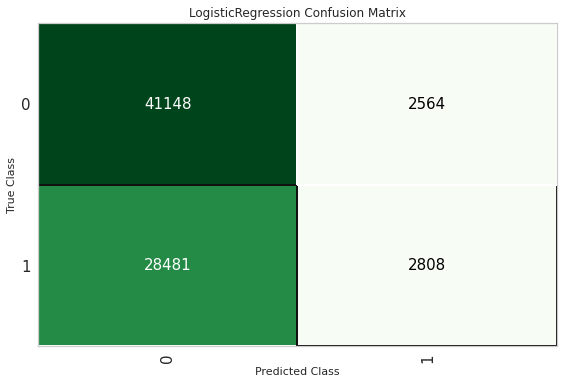

In [23]:
plot_model(lr, plot = 'confusion_matrix')

In [24]:
lgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5890,0.5871,0.1456,0.5305,0.2285,0.0591,0.0821
1,0.5922,0.5963,0.1437,0.5465,0.2275,0.0648,0.0916
2,0.5915,0.5938,0.1448,0.5428,0.2286,0.0638,0.0896
3,0.5891,0.5926,0.1363,0.5333,0.2171,0.0566,0.0808
4,0.5893,0.5947,0.1353,0.5344,0.2160,0.0566,0.0812
Mean,0.5902,0.5929,0.1411,0.5375,0.2235,0.0602,0.0851
SD,0.0014,0.0031,0.0044,0.0061,0.0057,0.0035,0.0046


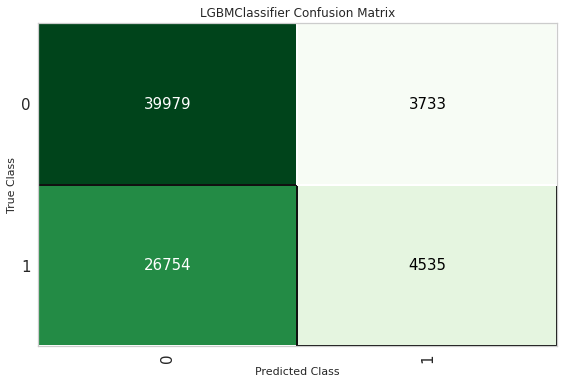

In [26]:
plot_model(lgbm, plot = 'confusion_matrix')

Not good. 

When the classifier is that bad I can forget about my idea....

I tried different approaches splitting loss = 0 and loss > 0, and loss <3 and loss >= 3. But the classifies did either always predict one outcome or were hardly better than random guessing. This is to bad to persue my idea... :(